### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta
from datetime import date
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import MultiTaskLasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

### Extracting dataset 

In [2]:
df1=pd.read_csv("FDA1.csv",index_col='Date')
df1
df3=pd.read_csv("FDA1.csv",index_col='Date')
df3

,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),Maximum rain per minute,...,Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure
Date,,,,,,,,,,,,,,,,,,,,,
01-01-2009,37.8,35,12.7,29.7,26.4,36.8,274,0.00,0.00,0,...,4,27,29.762,29.596,41.4,59.0,40.0,01-01-2009,1,0.166
02-01-2009,43.2,32,14.7,29.5,12.8,18.0,240,0.00,0.00,0,...,4,16,29.669,29.268,35.7,51.0,52.0,02-01-2009,1,0.401
03-01-2009,25.7,60,12.7,29.7,8.3,12.2,290,0.00,0.00,0,...,8,35,30.232,29.260,25.3,38.0,41.0,03-01-2009,1,0.972
04-01-2009,9.3,67,0.1,30.4,2.9,4.5,47,0.00,0.00,0,...,7,35,30.566,30.227,12.7,20.0,32.0,04-01-2009,1,0.339
05-01-2009,23.5,30,-5.3,29.9,16.7,23.1,265,0.00,0.00,0,...,5,13,30.233,29.568,38.0,53.0,32.0,05-01-2009,1,0.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24-07-2020,64.1,62,49.8,29.6,3.6,5.8,240,0.24,4.38,0,...,86,35,29.686,29.577,15.0,25.3,77.4,24-07-2020,7,0.109
25-07-2020,62.8,60,48.1,29.7,2.5,4.0,242,0.33,4.47,0,...,90,36,29.781,29.645,8.1,17.3,77.5,25-07-2020,7,0.136
26-07-2020,60.6,68,48.9,29.8,1.7,2.9,357,0.33,4.47,0,...,90,40,29.930,29.745,11.5,15.0,77.5,26-07-2020,7,0.185


### Data Cleaning

In [3]:
#Cleaning the data
#REmoving Null VAlues
df3.apply(pd.isnull).sum()
#The data doesn't have null values


Average temperature (°F)    0
Average humidity (%)        0
Average dewpoint (°F)       0
Average barometer (in)      0
Average windspeed (mph)     0
Average gustspeed (mph)     0
Average direction (°deg)    0
Rainfall for month (in)     0
Rainfall for year (in)      0
Maximum rain per minute     0
Maximum temperature (°F)    0
Minimum temperature (°F)    0
Maximum humidity (%)        0
Minimum humidity (%)        0
Maximum pressure            0
Minimum pressure            0
Maximum windspeed (mph)     0
Maximum gust speed (mph)    0
Maximum heat index (°F)     0
Date1                       0
Month                       0
diff_pressure               0
dtype: int64

### Checking missing values using graphs

<Axes: xlabel='Date'>

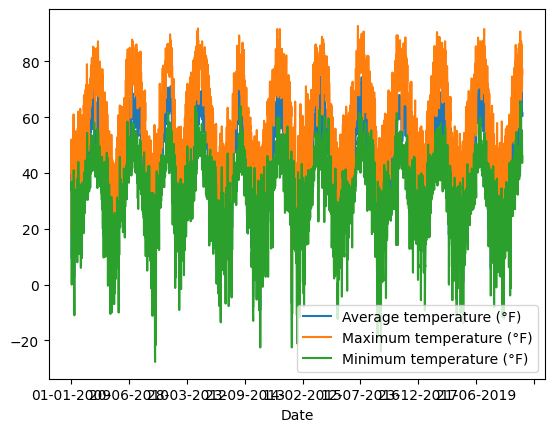

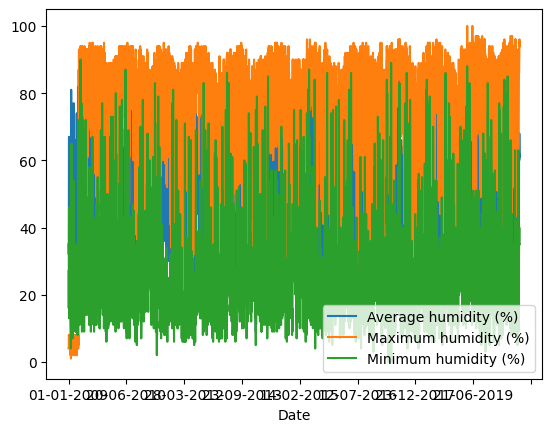

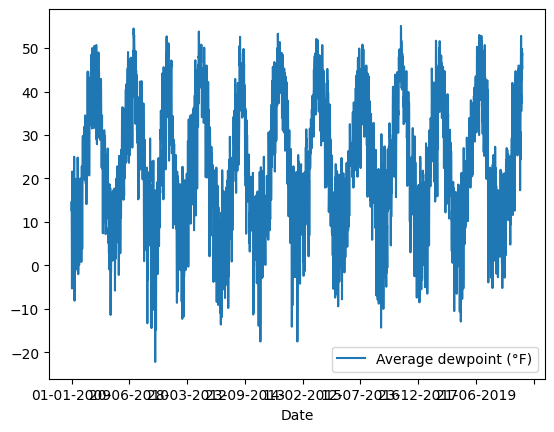

In [4]:
df3[["Average temperature (°F)","Maximum temperature (°F)","Minimum temperature (°F)"]].plot()
df3[["Average humidity (%)","Maximum humidity (%)","Minimum humidity (%)"]].plot()
df3[["Average dewpoint (°F)"]].plot()

#we don't have much gaps in these graphs So we don't have more missing values


### Checking the data types and Adding an index

In [5]:
df3.dtypes
df3.index =pd.to_datetime(df1.index,dayfirst=True)
df3.index

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-10',
               ...
               '2020-07-19', '2020-07-20', '2020-07-21', '2020-07-22',
               '2020-07-23', '2020-07-24', '2020-07-25', '2020-07-26',
               '2020-07-27', '2020-07-28'],
              dtype='datetime64[ns]', name='Date', length=3902, freq=None)

In [6]:
'''#Predicting columns
df1['avg_temp']=df1.shift(-1)["Average temperature (°F)"]
df1['avg_humidity']=df1.shift(-1)["Average humidity (%)"]
df1['avg_wind speed']=df1.shift(-1)["Average windspeed (mph)"]
df1['avg_direction']=df1.shift(-1)["Average direction (°deg)"]
#df1['max_rain_per_min']=df1.shift(-1)["Maximum rain per minute"]
df1['max_temp']=df1.shift(-1)["Maximum temperature (°F)"]
df1['min_temp']=df1.shift(-1)["Minimum temperature (°F)"]
# Ridge Regressiondf1['heat_index']=df1.shift(-1)["Maximum heat index (°F)"]

df2=df1.iloc[:-1,:].copy()
del df2["Date1"]
df2.dtypes
targets=['avg_temp','avg_humidity','avg_wind speed','avg_direction','max_temp','min_temp','heat_index']
predictors=['Average temperature (°F)','Average humidity (%)','Average dewpoint (°F)','Average barometer (in)','Average windspeed (mph)','Average gustspeed (mph)','Average direction (°deg)','Rainfall for month (in)','Rainfall for year (in)','Maximum temperature (°F)','Minimum temperature (°F)','Maximum humidity (%)','Minimum humidity (%)','Maximum pressure','Minimum pressure','Maximum windspeed (mph)','Maximum gust speed (mph)','Maximum heat index (°F)','Month','diff_pressure']
np.shape(predictors)
'''
targets=['Average temperature (°F)','Average humidity (%)','Maximum temperature (°F)','Minimum temperature (°F)','Maximum humidity (%)','Minimum humidity (%)','Maximum heat index (°F)']

In [7]:
del df3["Date1"]


df3

# Separate the features and target variables
X = df3.drop('Average temperature (°F)',axis=1)
y = df3[targets]


# Standardize the numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)



# Ridge Regression

In [8]:
#Model 1
# Split the data into training and testing sets[80-20]
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)



reg=Ridge(alpha=0.1)

reg.fit(X1_train,y1_train)
y1_pred=reg.predict(X1_test)


#Model 2
# Split the data into training and testing sets[70-30]
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg.fit(X2_train,y2_train)

Ridge(alpha=0.1)

y2_pred=reg.predict(X2_test)
y1_pred

array([[22.24543808, 75.99893612, 34.59733873, ..., 88.99984694,
        50.99944677, 34.60149959],
       [35.67434833, 38.99986596, 44.79954397, ..., 49.00027765,
        24.00013496, 44.80105773],
       [40.24768883, 49.99961328, 46.79602973, ..., 70.9988294 ,
        38.99844101, 46.8010266 ],
       ...,
       [60.94760153, 56.00178985, 77.20016654, ..., 88.99993878,
        25.00024886, 78.00125808],
       [52.77577564, 75.99702671, 69.80790528, ..., 95.00048462,
        43.99900546, 77.48749381],
       [11.66079839, 50.99653784, 37.79724055, ..., 75.00014239,
        11.00151196, 37.79927065]])

## Results

In [9]:
#Model1 
print("************** Model 1 **************")

mse = mean_squared_error(y1_test, y1_pred)
print("Mean Squared Error (MSE) of model 1 :", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) of model 1:", rmse)

r2_score = reg.score(X, y)
print("R-squared of model 1 :", r2_score)

print("Mean Absolute Error of model 1 : ",mean_absolute_error(y1_test,y1_pred))

#Model 2
print("************** Model 2 **************")

mse = mean_squared_error(y2_test, y2_pred)
print("Mean Squared Error (MSE) of model 2 :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) of model 2:", rmse)

r2_score = reg.score(X, y)
print("R-squared of model 2 :", r2_score)

print("Mean Absolute Error of model 2 : ",mean_absolute_error(y2_test,y2_pred))



************** Model 1 **************
Mean Squared Error (MSE) of model 1 : 0.2709027280244075
Root Mean Squared Error (RMSE) of model 1: 0.5204831678588727
R-squared of model 1 : 0.9987756302619102
Mean Absolute Error of model 1 :  0.1493936618279019
************** Model 2 **************
Mean Squared Error (MSE) of model 2 : 0.2677056814316989
Root Mean Squared Error (RMSE) of model 2: 0.5174028231771634
R-squared of model 2 : 0.9987756302619102
Mean Absolute Error of model 2 :  0.1508816107950759


# Random Forest

In [10]:
#Model 1
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, n_jobs=-1)
model.fit(X1_train, y1_train)

# Make predictions on the test set
y1_pred = model.predict(X1_test)

#Model 2
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, n_jobs=-1)
model.fit(X2_train, y2_train)

# Make predictions on the test set
y2_pred = model.predict(X2_test)



## Results


In [11]:
#Model1 
print("************** Model 1 **************")

mse = mean_squared_error(y1_test, y1_pred)
print("Mean Squared Error (MSE) of model 1 :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) of model 1:", rmse)

r2_score = reg.score(X, y)
print("R-squared of model 1 :", r2_score)

print("Mean Absolute Error of model 1 : ",mean_absolute_error(y1_test,y1_pred))

#Model 2
print("************** Model 2 **************")

mse = mean_squared_error(y2_test, y2_pred)
print("Mean Squared Error (MSE) of model 2 :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) of model 2:", rmse)

r2_score = reg.score(X, y)
print("R-squared of model 2 :", r2_score)

print("Mean Absolute Error of model 2 : ",mean_absolute_error(y2_test,y2_pred))


************** Model 1 **************
Mean Squared Error (MSE) of model 1 : 4.83013985695994
Root Mean Squared Error (RMSE) of model 1: 2.197757915913384
R-squared of model 1 : 0.9987756302619102
Mean Absolute Error of model 1 :  1.4663102249862803
************** Model 2 **************
Mean Squared Error (MSE) of model 2 : 5.388786841893377
Root Mean Squared Error (RMSE) of model 2: 2.3213760664514003
R-squared of model 2 : 0.9987756302619102
Mean Absolute Error of model 2 :  1.5370631938514074


# MultiTaskLasso

In [12]:
#Model 1
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Multi-Task Lasso model
model = MultiTaskLasso(alpha=0.1)
model.fit(X1_train, y1_train)

# Make predictions on the test set
y1_pred = model.predict(X1_test)

#Model 2
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Multi-Task Lasso model
model = MultiTaskLasso(alpha=0.1)
model.fit(X2_train, y2_train)

# Make predictions on the test set
y2_pred = model.predict(X2_test)

## Results


In [13]:
#Model1 
print("************** Model 1 **************")

mse = mean_squared_error(y1_test, y1_pred)
print("Mean Squared Error (MSE) of model 1 :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) of model 1:", rmse)

r2_score = reg.score(X, y)
print("R-squared of model 1 :", r2_score)

print("Mean Absolute Error of model 1 : ",mean_absolute_error(y1_test,y1_pred))

#Model 2
print("************** Model 2 **************")

mse = mean_squared_error(y2_test, y2_pred)
print("Mean Squared Error (MSE) of model 2 :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) of model 2:", rmse)

r2_score = reg.score(X, y)
print("R-squared of model 2 :", r2_score)

print("Mean Absolute Error of model 2 : ",mean_absolute_error(y2_test,y2_pred))


************** Model 1 **************
Mean Squared Error (MSE) of model 1 : 0.42319432117075717
Root Mean Squared Error (RMSE) of model 1: 0.6505338739610391
R-squared of model 1 : 0.9987756302619102
Mean Absolute Error of model 1 :  0.3537939831198967
************** Model 2 **************
Mean Squared Error (MSE) of model 2 : 0.4269137388540854
Root Mean Squared Error (RMSE) of model 2: 0.6533863626171619
R-squared of model 2 : 0.9987756302619102
Mean Absolute Error of model 2 :  0.3592100636166721


# XG Boost

In [14]:
#Model 1
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = xgb.XGBRegressor(n_estimators=100, max_depth=5)
model.fit(X1_train, y1_train)

# Make predictions on the test set
y1_pred = model.predict(X1_test)

#Model 2
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the XGBoost model
model = xgb.XGBRegressor(n_estimators=100, max_depth=5)
model.fit(X2_train, y2_train)

# Make predictions on the test set
y2_pred = model.predict(X2_test)


## Results 

In [15]:
#Model1 
print("************** Model 1 **************")

mse = mean_squared_error(y1_test, y1_pred)
print("Mean Squared Error (MSE) of model 1 :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) of model 1:", rmse)

r2_score = reg.score(X, y)
print("R-squared of model 1 :", r2_score)

print("Mean Absolute Error of model 1 : ",mean_absolute_error(y1_test,y1_pred))

#Model 2
print("************** Model 2 **************")

mse = mean_squared_error(y2_test, y2_pred)
print("Mean Squared Error (MSE) of model 2 :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) of model 2:", rmse)

r2_score = reg.score(X, y)
print("R-squared of model 2 :", r2_score)

print("Mean Absolute Error of model 2 : ",mean_absolute_error(y2_test,y2_pred))


************** Model 1 **************
Mean Squared Error (MSE) of model 1 : 0.401897558277531
Root Mean Squared Error (RMSE) of model 1: 0.6339539086381052
R-squared of model 1 : 0.9987756302619102
Mean Absolute Error of model 1 :  0.23014864041249375
************** Model 2 **************
Mean Squared Error (MSE) of model 2 : 0.4053861431801861
Root Mean Squared Error (RMSE) of model 2: 0.6366994135227283
R-squared of model 2 : 0.9987756302619102
Mean Absolute Error of model 2 :  0.23240667894059744


##### As the results are more accurate for ridge regression , a line plot is plotted for the actual and predicted vaalues

In [16]:
y1_test=pd.DataFrame(y1_test)
y1_pred=pd.DataFrame(y1_pred,columns=['pre_avg_temp','pre_avg_humidity','pre_max_temp','pre_min_temp','pre_max_humidity','pre_min_humidity','pre_max_heat_index'])
y1_pred.index=y1_test.index

combined=pd.concat([y1_test,y1_pred],axis=1)
combined

,Average temperature (°F),Average humidity (%),Maximum temperature (°F),Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum heat index (°F),pre_avg_temp,pre_avg_humidity,pre_max_temp,pre_min_temp,pre_max_humidity,pre_min_humidity,pre_max_heat_index
Date,,,,,,,,,,,,,,
2012-01-07,23.4,76,34.6,11.2,89,51,34.6,23.907000,75.999733,34.569790,11.303686,89.000351,50.999954,34.301163
2018-01-28,34.2,39,44.8,27.6,49,24,44.8,35.198170,39.000553,44.658539,27.812483,49.004906,23.999363,44.560249
2015-01-05,38.9,50,46.8,32.2,71,39,46.8,40.887066,49.999390,46.874367,32.007919,70.997803,38.998852,46.816860
2019-08-05,63.5,68,78.3,51.8,93,34,79.0,64.810928,68.001656,78.295265,51.505951,93.000313,34.000771,79.054642
2014-04-01,34.1,59,44.1,23.2,87,32,44.1,32.722336,58.998356,44.168591,23.285793,86.999771,31.998098,44.086353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-28,13.1,50,36.0,-8.6,76,17,36.0,14.807139,49.999466,35.939346,-9.768060,76.001472,16.999496,36.026215
2020-06-16,65.3,28,81.5,40.8,63,14,79.3,63.784863,27.999201,81.543579,40.778233,63.001125,14.000596,79.321609
2014-08-03,61.2,56,77.2,42.9,89,25,78.0,60.400288,56.000984,77.295692,42.961716,89.000351,25.000814,78.029472


<Axes: xlabel='Date'>

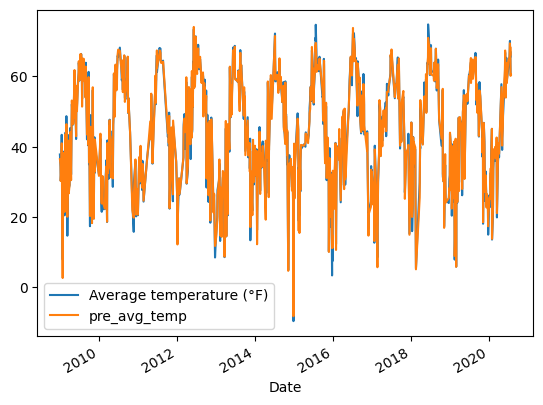

In [17]:
combined[["Average temperature (°F)","pre_avg_temp"]].plot()

<Axes: xlabel='Date'>

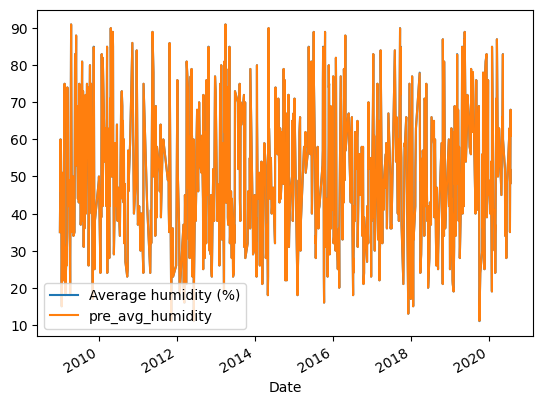

In [18]:
combined[["Average humidity (%)","pre_avg_humidity"]].plot()

<Axes: xlabel='Date'>

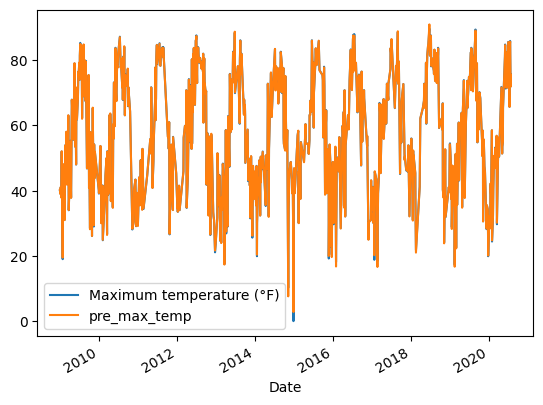

In [19]:
combined[["Maximum temperature (°F)","pre_max_temp"]].plot()

<Axes: xlabel='Date'>

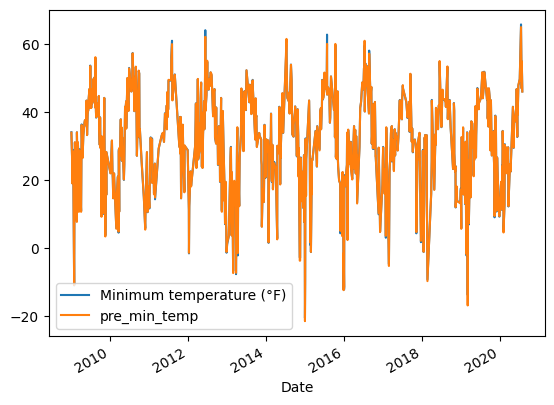

In [20]:
combined[["Minimum temperature (°F)","pre_min_temp"]].plot()

<Axes: xlabel='Date'>

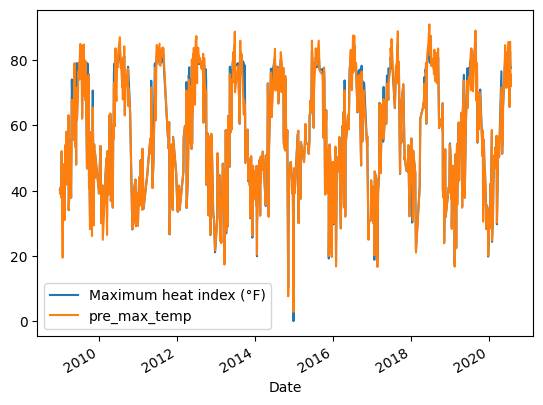

In [21]:
combined[["Maximum heat index (°F)","pre_max_temp"]].plot()